<h1> Texas Accidents - Day and Time Analysis </h1>

This juypter notebook contains visualizations built based on US Accidents filtered to Texas State which are from 2016 - 2020

<b> DatasetSource </b> : https://www.kaggle.com/sobhanmoosavi/us-accidents

Further this dataset is filtered to extract only Texas Accidents dataset and visualizations are done based on the below different variables

Types of variables used are:
1. <b> Categorical (object) </b>
2. <b> Numerical (int, float) </b>

Few critical variables include starttime and endtime of the accident, severity of the accident that has beeen recorded, impact of traffic distance that has been caused by the acccident, and few others like weather conditions, temperature, visibility, city and address of where the accident.

The inference that is taken from the data of Texas Accidents can also be used on multiple occasions and numerous applications such as studying and identifying accident hotspot locations, real-time accident prediction, casualty analysis, and effect rules to predict accidents or study and infer the impact of precipitation or other environmental stimuli on the occurrence of an accident.






In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns          #open source library that can be used along with matplotlib and pandas to make visulizations


plt.style.use('fivethirtyeight')    #one of the style avaibale in the matplotlib to make graphs more appealing

# Visualizations  
# 1. Pie Chart 
# 2. Boxplot 
# 3. Barplot
# 4. Histogram
# 5. Line Graph
# 6. Scatterplot
# 7. Heatmaps

In [2]:
#1. Reading the data into CSV

data = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [3]:
#Converting the Columns End_Time, Start_Time and Weather_Timestamp to datetimes as they are originally attached to "Time" datatype

data['End_Time'] = pd.to_datetime(data['End_Time'])
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Weather_Timestamp']= pd.to_datetime(data['Weather_Timestamp'])

In [4]:
#Renaming few columns for easy access to use in the code as shown below

data.rename({'Start_Time':'ST', 'End_Time':'ET', 'Weather_Timestamp':'Weather_Times','Distance(mi)':'Distance' ,'Temperature(F)':'Temperature','Wind_Chill(F)':'Wind_Chill','Humidity(%)':'Humidity','Pressure(in)':'Pressure','Visibility(mi)':'Visibility','Wind_Speed(mph)':'Wind_Speed','Precipitation(in)':'Precipitation'},axis = 1,inplace = True)

#This command shows the data type for different columns.
data.dtypes

ID                               object
Severity                          int64
ST                       datetime64[ns]
ET                       datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance                        float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Times            datetime64[ns]
Temperature                     float64
Wind_Chill                      float64
Humidity                        float64
Pressure                        float64


<h4> Dropping a few columns because they contain similar data which is present in other columns. 
     Country is also dropped because this has only one value i.e. US </h4>
     
<b> Deleted Columns: </b>
1. Country 
2. Wind chill (this will be covered in the below newly created column called "Weather_data"
3. End Lat
4. End Lng
5. Twilight (this variable contains redundant data with 3 other similar columns)
6. Description

In [5]:
data.drop(['Country','Wind_Chill','End_Lat','End_Lng','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Number','Description'], axis = 1, inplace = True)


In [6]:
#Adding a few columns here to end of the dataset that will be useful for our visulaizations


#The below code gives the day and hour at which the accident was recorded

#DAYOFTHEWEEK
data['DayOfWeek'] = data['ST'].dt.day_name()   #extracting day from Start time of the accident


#HOUR of the accident ex: 0,1,2,......24 hrs when the accident happened. Extracting values from Starttime(ST)
data['HourOfDay'] = data['ST'].dt.hour
data.head()


,ID,Severity,ST,ET,Start_Lat,Start_Lng,Distance,Street,Side,City,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,DayOfWeek,HourOfDay
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,3.230,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,False,Night,Monday,0
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,0.747,I-70 E,R,Dayton,...,False,False,False,False,False,False,False,Night,Monday,5
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,0.055,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,False,Night,Monday,6
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,0.219,US-50 E,R,Cincinnati,...,False,False,False,False,False,False,False,Night,Monday,6
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,0.123,I-77 N,R,Akron,...,False,False,False,False,False,False,False,Night,Monday,6


In [7]:
#Filtering out the state of texas to get only "TX" data


texas_data = data["State"] == "TX" #this is the condition being assigned to a new variable

texas_data = data[texas_data]

texas_data.head()


,ID,Severity,ST,ET,Start_Lat,Start_Lng,Distance,Street,Side,City,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,DayOfWeek,HourOfDay
12121,A-2728721,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.84365,-96.77463,1.915,US-75 S,R,Dallas,...,False,False,False,False,False,False,False,Day,Wednesday,15
12122,A-2728722,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.84662,-96.63736,0.021,I-635 S,R,Dallas,...,False,False,False,False,False,False,False,Day,Wednesday,15
12123,A-2728723,3,2016-11-30 15:15:48,2016-11-30 21:15:48,32.86693,-96.66617,0.616,LBJ Fwy E,R,Garland,...,False,False,False,False,False,False,False,Day,Wednesday,15
12126,A-2728726,2,2016-11-30 15:35:51,2016-11-30 21:35:51,32.79426,-97.21214,0.470,I-820 N,R,Fort Worth,...,False,False,False,False,False,False,False,Day,Wednesday,15
12128,A-2728728,2,2016-11-30 16:16:05,2016-11-30 22:16:05,32.81235,-97.31399,0.885,I-35W N,R,Fort Worth,...,False,False,False,False,False,False,False,Day,Wednesday,16


In [8]:
#Creating a new column called Traffic_Level_of_Data based on the following user defined function


def traffic_level(texas_data):
    
    if (texas_data['Distance'] <= 0.5):      #if distance is less than 0.5 miles
        return 'Level1'
    elif(texas_data['Distance'] > 0.5) and (texas_data['Distance'] <= 1): #dist > 0.5 miles and <= 1 mile
         return 'Level2'
    elif((texas_data['Distance'] > 1) and (texas_data['Distance'] <= 2)):   #dist > 1 mile and <= 2 miles
         return 'Level3'
    else:
         return 'Level4'
         

texas_data['Traffic_Level_of_Data'] = texas_data.apply(traffic_level, axis = 1)


<ipython-input-8-217df46107c5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_data['Traffic_Level_of_Data'] = texas_data.apply(traffic_level, axis = 1)


In [9]:
#Duration of the accident can be calculated from the difference of start time and end time 

texas_data["Traffic_Duration"] = (texas_data["ET"]- texas_data["ST"])

<ipython-input-9-d2762e7fd8ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_data["Traffic_Duration"] = (texas_data["ET"]- texas_data["ST"])


In [10]:
#Using the new created "Traffic_Duration" column we can find the "Minutes" using lamda function

texas_data['Minutes'] = texas_data["Traffic_Duration"].apply(lambda x: (x.total_seconds() / 60))
texas_data['Minutes']


<ipython-input-10-3d029d766b18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_data['Minutes'] = texas_data["Traffic_Duration"].apply(lambda x: (x.total_seconds() / 60))


12121      360.000000
12122      360.000000
12123      360.000000
12126      360.000000
12128      360.000000
              ...    
1515796     29.150000
1515797     29.550000
1515798     29.666667
1515800     27.433333
1515801     29.900000
Name: Minutes, Length: 75142, dtype: float64

In [11]:
#Using the new created "Traffic_Duration" column we can find the "Hours" using lamda function

texas_data['Hours'] = texas_data["Traffic_Duration"].apply(lambda x: (x.total_seconds() / 3600))
texas_data['Hours']


<ipython-input-11-9b5ef61d8dec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_data['Hours'] = texas_data["Traffic_Duration"].apply(lambda x: (x.total_seconds() / 3600))


12121      6.000000
12122      6.000000
12123      6.000000
12126      6.000000
12128      6.000000
             ...   
1515796    0.485833
1515797    0.492500
1515798    0.494444
1515800    0.457222
1515801    0.498333
Name: Hours, Length: 75142, dtype: float64

In [12]:
#Creating a new column uisng a user defined function for weather conditions


windy = ['Blowing Dust','Blowing Dust / Windy','Cloudy / Windy','Fair / Windy','Light Snow','Light Snow / Windy','Mist','Snow','Snow Grains','Widespread Dust','Wintry MixWintry Mix / Windy']
fair = ['Clear','Fair']
rainy = ['Heavy Drizzle','Heavy Rain','Heavy Rain / Windy','Heavy Rain Showers','Light Drizzle','Light Drizzle / Windy','Light Freezing Drizzle','Light Freezing Rain',
'Light Rain','Light Rain / Windy','Light Rain Shower','Light Rain Showers','Light Rain with Thunder','N/A Precipitation','Showers in the Vicinity','Rain','Rain / Windy','Rain Shower','Rain Showers']
fog = ['Fog / Windy','Fog','Haze','Haze / Windy','Light Fog','Light Haze','Light Ice Pellets','Patches of Fog','Shallow Fog','Smoke']


cloud = ['Cloudy','Cloudy / Windy','Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy','Partly Cloudy / Windy','Scattered Clouds','Overcast','Scattered Clouds']


stormy = ['Heavy T-Storm','Heavy T-Storm / Windy','Heavy Thunderstorms and Rain','Light Thunderstorms and Rain','T-Storm','T-Storm / Windy','Thunder','Thunder / Wintry Mix / Windy','Thunder and Hail / Windy','Thunder in the Vicinity','Thunderstorm','Thunderstorms and Rain']

def make_weather(texas_data):
    
    if (texas_data['Weather_Condition'] in windy ):
        return 'Windy'
    elif(texas_data['Weather_Condition'] in  fair):
         return 'Fair_Clean'
    elif(texas_data['Weather_Condition'] in rainy):
         return 'Rainy'
    elif(texas_data['Weather_Condition'] in fog):
         return 'Fog_Mist'  
    elif (texas_data['Weather_Condition'] in stormy):
        return 'Stormy'
    else:
         return 'Cloudy'
         


texas_data['Weather_Data'] = texas_data.apply(make_weather, axis = 1)


<ipython-input-12-b437ea09ff4f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_data['Weather_Data'] = texas_data.apply(make_weather, axis = 1)


<h3> The below cell displays all the columns which were modified(add/delete/changing names and data types) that were done to the filtered out "Texas dataset" </h3>

New columns that were added are:
1. Traffic level of data
2. Traffic duration
3. Hours
4. Minutes
5. Weather data

In [13]:
texas_data.dtypes

ID                                object
Severity                           int64
ST                        datetime64[ns]
ET                        datetime64[ns]
Start_Lat                        float64
Start_Lng                        float64
Distance                         float64
Street                            object
Side                              object
City                              object
County                            object
State                             object
Zipcode                           object
Timezone                          object
Airport_Code                      object
Weather_Times             datetime64[ns]
Temperature                      float64
Humidity                         float64
Pressure                         float64
Visibility                       float64
Wind_Direction                    object
Wind_Speed                       float64
Precipitation                    float64
Weather_Condition                 object
Amenity         

<h3> Filtering the dataset </h3>

Created few filters and applied this to the dataset to make visualizations that are helpful for the Day and Time analysis of "TEXAS ACCIDENTS"

The following Filters are created:
1. Time 
2. Distance
3. Temparture
4. Severity



In [14]:
# TEMPERATURE FILTER
#Here, filtering out the extreme temperatures

temp_fil = (texas_data['Temperature']<=112) & (texas_data['Temperature'] >= 30)
texas_data = texas_data.loc[temp_fil]


In [15]:
# DISTANCE FILTER

#filtering out the distance records which have less than two miles
distance_filt_1 = texas_data['Distance']<=2
texas_data_distfilt= texas_data.loc[distance_filt_1]


In [16]:
#Time FILTER

#for filtering out time - considered "minutes" and not "hours". So, that not to loose records in extreme volumes and this gives us the most accurated data
time_filt = texas_data['Minutes']<= 720

texas_data_timefilt = texas_data_distfilt.loc[time_filt]



In [17]:
#SEVERITY FILTER
severity_one = texas_data_timefilt['Severity'] ==1
severity_one = texas_data_timefilt[severity_one]

severity_two = texas_data_timefilt['Severity'] ==2
severity_two = texas_data_timefilt[severity_two]

severity_three = texas_data_timefilt['Severity'] ==3
severity_three = texas_data_timefilt[severity_three]

severity_four = texas_data_timefilt['Severity'] ==4
severity_four = texas_data_timefilt[severity_four]

severity_one_df = pd.DataFrame(severity_one['HourOfDay'].value_counts()).reset_index().rename(columns={'index':'Hour_Number', 'HourOfDay':'Cases'}).sort_values(by='Hour_Number', ascending=True)


severity_two_df = pd.DataFrame(severity_two['HourOfDay'].value_counts()).reset_index().rename(columns={'index':'Hour_Number', 'HourOfDay':'Cases2'}).sort_values(by='Hour_Number', ascending=True)


severity_three_df = pd.DataFrame(severity_three['HourOfDay'].value_counts()).reset_index().rename(columns={'index':'Hour_Number', 'HourOfDay':'Cases3'}).sort_values(by='Hour_Number', ascending=True)


severity_four_df = pd.DataFrame(severity_four['HourOfDay'].value_counts()).reset_index().rename(columns={'index':'Hour_Number', 'HourOfDay':'Cases4'}).sort_values(by='Hour_Number', ascending=True)


df_total_2and3 = pd.merge(severity_two_df,severity_three_df, on = "Hour_Number", how = 'left')

df_total_4and1 = pd.merge(severity_four_df,severity_one_df, on = "Hour_Number", how = 'left')

df_total = pd.merge(df_total_2and3,df_total_4and1,on = "Hour_Number", how = 'left')

df_total


,Hour_Number,Cases2,Cases3,Cases4,Cases
0,0,1817,244,68,NaN
1,1,1678,216,80,NaN
2,2,1566,229,107,NaN
3,3,1293,317,115,NaN
4,4,1259,314,122,1.0
5,5,1432,658,171,8.0
6,6,2451,1207,164,11.0
7,7,2723,1334,206,21.0
8,8,2373,1132,146,26.0
9,9,2047,987,158,69.0


<h3> Final Dataset for Texas Accidents </h3>

The below cell displays few records of the data after modifying and filtering the columns

This dataset is further used to draw visualizations for our analysis on Texas Accidents

In [18]:
texas_data

,ID,Severity,ST,ET,Start_Lat,Start_Lng,Distance,Street,Side,City,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,DayOfWeek,HourOfDay,Traffic_Level_of_Data,Traffic_Duration,Minutes,Hours,Weather_Data
12121,A-2728721,2,2016-11-30 15:29:48,2016-11-30 21:29:48,32.843650,-96.774630,1.915,US-75 S,R,Dallas,...,False,False,Day,Wednesday,15,Level3,0 days 06:00:00,360.000000,6.000000,Fair_Clean
12122,A-2728722,2,2016-11-30 15:41:16,2016-11-30 21:41:16,32.846620,-96.637360,0.021,I-635 S,R,Dallas,...,False,False,Day,Wednesday,15,Level1,0 days 06:00:00,360.000000,6.000000,Fair_Clean
12123,A-2728723,3,2016-11-30 15:15:48,2016-11-30 21:15:48,32.866930,-96.666170,0.616,LBJ Fwy E,R,Garland,...,False,False,Day,Wednesday,15,Level2,0 days 06:00:00,360.000000,6.000000,Fair_Clean
12129,A-2728729,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.793850,-96.702780,0.502,R L Thornton Fwy E,R,Dallas,...,False,False,Day,Wednesday,16,Level2,0 days 06:00:00,360.000000,6.000000,Fair_Clean
12130,A-2728730,3,2016-11-30 16:16:05,2016-11-30 22:16:05,32.857100,-96.770460,0.769,Southwestern Blvd,R,Dallas,...,True,False,Day,Wednesday,16,Level2,0 days 06:00:00,360.000000,6.000000,Fair_Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515796,A-4239139,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,0.493,I-610 S,R,Houston,...,False,False,Day,Friday,13,Level1,0 days 00:29:09,29.150000,0.485833,Stormy
1515797,A-4239140,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,0.399,I-10 E,R,Houston,...,False,False,Day,Friday,13,Level1,0 days 00:29:33,29.550000,0.492500,Stormy
1515798,A-4239141,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,0.520,US-90 E,R,Houston,...,False,False,Day,Friday,13,Level2,0 days 00:29:40,29.666667,0.494444,Stormy
1515800,A-4239143,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,1.153,US-59 N,R,Humble,...,False,False,Day,Friday,16,Level3,0 days 00:27:26,27.433333,0.457222,Cloudy


<h2> VISULIZATIONS </h2>

Using the above filtered and modified dataset "Texas Accidents" we made <b> "Time" </b> and <b> "Day" </b> analysis of data

<b> Seven graphs</b> were made using few critical variables such as:
1. Year
2. Cases
3. Severity
4. Distance
5. Hours
6. DayofWeek

<b> Visualizations </b> done are :
1. Line Graph
2. Bar Graph
3. Histogram
4. Scatter Plot
5. Pie Chart
6. Box Plot
7. Heat Map

<h2> LINE GRAPH </h2>

<h3> 1. Year Vs. Number of Accidents </h3>
To make a clear understanding of exactly how many accidents were recorded per year in the state of Texas, created a line graph to visualize the data.
    
   Made a dataframe for the year column to calculate no. of cases occured per each year. Year of the accident is derived from the Start time (ST) using datetime package. This is plotted in a line graph. The highest number of accidents are recorded in 2020.

<h3> 2. Number of accidents occuring at different hours of the day with their severity </h3>
For this line graph, created a severity filter along with datatframe that extracts the hour of the day along with the number of accidents that occured during that hour with severity level. 

This line graph is used to analyze at which hour of the day and at which severity level were the most number of accidents occuring.

   It was concluded that the most number of accidents were occuring at severity level2 around 4 pm to 5 pm (measures as 15 - 18 hour in the graph)

        



In [19]:
#linegraphs

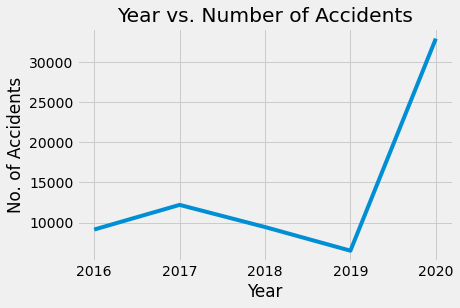

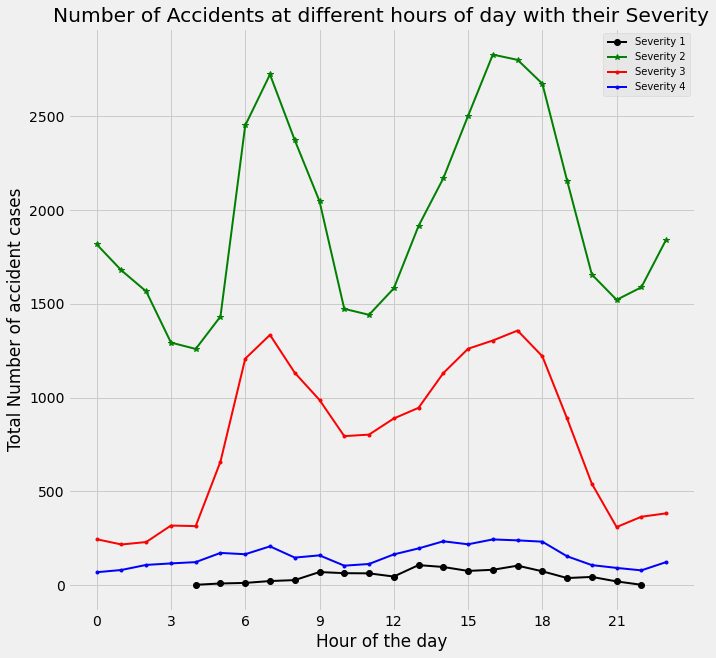

In [20]:
#Line graph 1
year_df = pd.DataFrame(texas_data_timefilt.ST.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'ST':'Cases'}).sort_values(by='Year', ascending=True)

year_df

plt.plot(year_df.Year, year_df.Cases)


plt.title('Year vs. Number of Accidents')

plt.xlabel('Year')

plt.ylabel('No. of Accidents')

plt.show()


#Line graph 2 
plt.figure(figsize =(10,10))

plt.title('Number of Accidents at different hours of day with their Severity')
plt.style.use('ggplot')
plt.plot(df_total.Hour_Number, df_total.Cases, label = 'Severity 1', color = 'k', marker ='o', linewidth = 2)
plt.plot(df_total.Hour_Number, df_total.Cases2,'g.-', label = 'Severity 2', linewidth = 2,marker ='*')
plt.plot(df_total.Hour_Number, df_total.Cases3, 'r.-', label = 'Severity 3',linewidth = 2, marker = '.')
plt.plot(df_total.Hour_Number, df_total.Cases4, 'b.-', label = 'Severity 4',linewidth = 2)

plt.xticks(df_total.Hour_Number[::3])
plt.xlabel('Hour of the day')
plt.ylabel('Total Number of accident cases')
plt.legend()

plt.show()

<h2> Bar Graph </h2>


<h3> Cities Vs. Number of Cases </h3>
From the above visulization done on "Hours of Day", "severity", "year" and "Number of accidents". Wanted to know clear analysis of which city has recorded the highest number of accidents.

   For this, created a new dataframe using "Timefilter" thereby calculating cases per that city.
   
   This is concluded that <b> "Houston" </b> city has highest number of accidents recored around 20000 and <b> Fort Worth </b> has only a little above of 2500 cases standing as the city with least number of cases.
    

<BarContainer object of 5 artists>

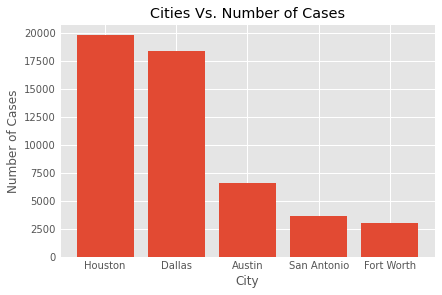

In [21]:
city_df = pd.DataFrame(texas_data_timefilt['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

most_prone = pd.DataFrame(city_df.head(5))    #creating a dataframe to find number of cases per year


plt.title('Cities Vs. Number of Cases')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.xticks(fontsize = 10)   #to modify the fontsize of x-axis names

plt.bar(most_prone.City,most_prone.Cases)


<h2> Pie Chart </h2>

<h3> Day Vs. Night </h3>
The next analysis to be considered is to find out which part of the day the accidents occured the most. 

The column "Sunirse_Sunset" is used which categorizes the accidents occured as "DAY" or "NIGHT" to find out the part of the day the accident happened. 

   Using a Pie Chart for this visualization as there are only 2 attributes to be compared and pie chart serves that purpose the best as it is used to compare "categorical" variables.
    
   The conclusion from this chart is that accidents occured the most during DAY than NIGHT in Texas State

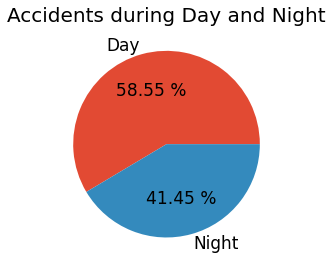

In [22]:
# Now let us see if the accidents happen during days or night
day = texas_data_timefilt.loc[texas_data_timefilt['Sunrise_Sunset']=='Day'].count()[0]
night = texas_data_timefilt.loc[texas_data_timefilt['Sunrise_Sunset']=='Night'].count()[0]

day_night_label = ['Day',"Night"]

plt.title("Accidents during Day and Night", fontsize = 20)

plt.pie([day,night], labels= day_night_label, autopct = '%.2f %%', textprops={'fontsize': 17})  #textprops - to modify the font size of the labels of pie chart


plt.show()


<h2> Histogram </h2>

<h3> Number of Accidents vs. Distance of Impact </h3>
The next analysis we considered is to find out at which distant of impact did the most accidents occur. 

Decided to use a histogram to visualize the data of the number of accidents occurring at a particular distance of impact. 

   Histogram was used because both the attributes used represent numerical values and 1 attribute used for the x-axis (distance) is continous, and this chart is best used to represent this type of data. 
    
   The conclusion that was made from this chart is that the most number of accidents occured at the distance of impact between 0.0-0.5 miles, and the least number of accidents occured at the distance of impact between 1.5-2.0 miles. 
   
   Correlation was insignificant to conclude about the number of accidents occuring during a certain day of the week and time. 

    

(array([46396., 17303.,  5119.,  1782.]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 <BarContainer object of 4 artists>)

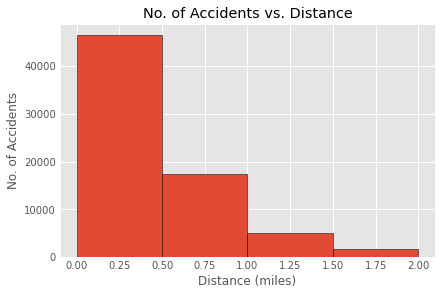

In [23]:
# Hstogram of Distance as a continuous data

dist2 =  texas_data_distfilt['Distance']

bins2 = [0,0.5,1,1.5,2]

plt.title('No. of Accidents vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('No. of Accidents')

plt.hist(dist2, bins = bins2, edgecolor = 'black')


<h2> Boxplot </h2>

<h3> Hour of the Day vs. Severity </h3>
The next analysis is to find out at which hour of the day was the severtiy level highest.  

Used a Boxplot to visualize the data of the severity levels occuring at a particular hour of the day. 
    
   Boxplot was used because one attribute represents a dimension, in this case severity, and another attribute used represents a measure, in this case distance, and comparing a measure against a dimension. 
   
   The conclusion that was made from this chart is that the severity level was the highest between the hours of 15 and 20. 
    


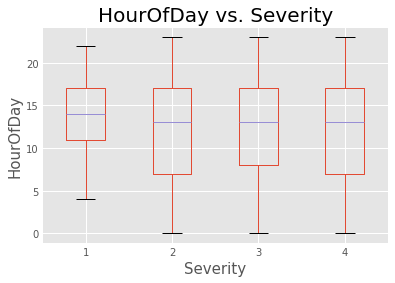

In [24]:
texas_data_timefilt.boxplot(column = 'HourOfDay', by = 'Severity')

plt.title('HourOfDay vs. Severity', fontsize = 20)

plt.suptitle('')

plt.xlabel('Severity', fontsize = 15)
plt.ylabel('HourOfDay', fontsize = 15)

plt.show()


<h2> ScatterPlot </h2>

<h3> Hour of the Day Vs. Number of cases </h3>
The next analysis is to find out at which hour of the day was accidents occuring the most. 

   Using a ScatterPlot to visualize the data of the accidents occuring at a particular hour of the day. 

   ScatterPlot was used to see a correlation between the cases and the hour of the day, and since both the attributes used represent numerical variables, this would be the best visualization to use to display the data. 
   
   The conclusion that was made from this chart is that the most number of accidents were occurring between the hour of 15 and 16 of the day. 



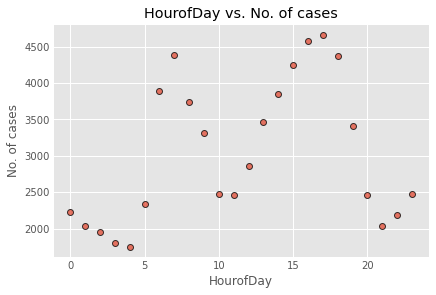

In [25]:
hour_df = pd.DataFrame(texas_data.ST.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'ST':'Cases'}).sort_values('Hours')

hours = hour_df['Hours']
cases = hour_df['Cases']

plt.title('HourofDay vs. No. of cases')
plt.xlabel('HourofDay')
plt.ylabel('No. of cases')


plt.scatter(hours, cases, edgecolor = 'black', linewidth = 1, alpha = 0.75)

<h2> Heat Map </h2>

<h3> Day of Week and Severity Levels </h3>

The next analysis is to find out on what day of the week was the severity level the highest and occuring the most. For this decided to use a heat map  to visualize the data of the level of severity occuring at a particular day of the week, which also displayed the number of times this severity was occuring. 

A heat map represents 2 categorial variables, and in this case, our 2 variables we considered are Day of the Week, and the Severity Level of the accident. 

To execute this visualization, we imported a open source library known as seaborn (sns) to use along with matplotlib, and draw our analysis. 

For this, grouped time filtered Texas data by days of the week, which are plotted aganist severity levels of the accidents. 

It is observed that on Fridays, accidents with severity level of 2 are the highest. 

<AxesSubplot:xlabel='Severity', ylabel='DayOfWeek'>

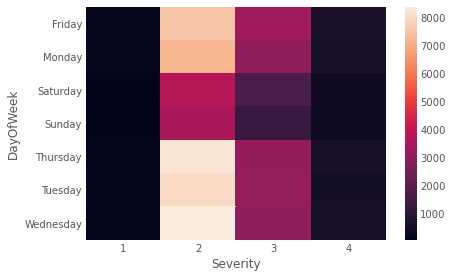

In [26]:
heatmap_3= (texas_data_timefilt.groupby('DayOfWeek').Severity.value_counts().unstack().fillna(0))

sns.heatmap(heatmap_3)